In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("indian_food.csv")

In [4]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [5]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [6]:
df.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

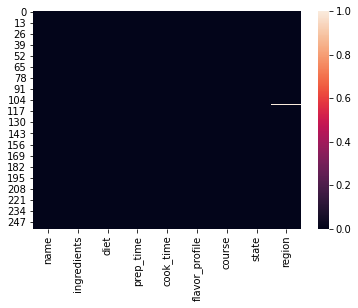

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.fillna('', inplace=True)
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [10]:
df[['name','ingredients']] =df[['name','ingredients']].applymap(lambda x: ' '.join(x.replace(' ', '').split(',')[:3]))
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balushahi,Maidaflour yogurt oil,vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,Gramflour ghee sugar,vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajarkahalwa,Carrots milk sugar,vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,Flour ghee kewra,vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulabjamun,Milkpowder plainflour bakingpowder,vegetarian,15,40,sweet,dessert,West Bengal,East


In [11]:
df.drop(["prep_time","flavor_profile"],axis=1,inplace=True)

In [15]:
df.drop("cook_time",axis=1,inplace=True)

In [16]:
title = df.apply(' '.join, axis=1)

In [17]:
title

0      Balushahi Maidaflour yogurt oil vegetarian des...
1      Boondi Gramflour ghee sugar vegetarian dessert...
2      Gajarkahalwa Carrots milk sugar vegetarian des...
3      Ghevar Flour ghee kewra vegetarian dessert Raj...
4      Gulabjamun Milkpowder plainflour bakingpowder ...
                             ...                        
250    TilPitha Glutinousrice blacksesameseeds gur ve...
251    Bebinca Coconutmilk eggyolks clarifiedbutter v...
252    Shufta Cottagecheese drydates driedrosepetals ...
253    MawaBati Milkpowder dryfruits arrowrootpowder ...
254    Pinaca Brownrice fennelseeds gratedcoconut veg...
Length: 255, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [19]:
tfidf_vect = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 3), max_df = .5)
tfidf= tfidf_vect.fit_transform(title)

In [20]:
pickle.dump(tfidf, open('food.pickle', 'wb'))

In [21]:
vectr = cosine_similarity(tfidf, tfidf)

In [22]:
pd.DataFrame(data=vectr, index=df['name'], columns=df['name']).head()

name,Balushahi,Boondi,Gajarkahalwa,Ghevar,Gulabjamun,Imarti,Jalebi,Kajukatli,Kalakand,Kheer,...,PaniPitha,Payokh,Prawnmalaicurry,RedRice,Shukto,TilPitha,Bebinca,Shufta,MawaBati,Pinaca
name,,,,,,,,,,,,,,,,,,,,,
Balushahi,1.000000,0.028523,0.019321,0.025353,0.215646,0.241010,0.017130,0.020684,0.237226,0.023359,...,0.012774,0.031996,0.108669,0.0,0.111317,0.030257,0.025093,0.015585,0.015546,0.024667
Boondi,0.028523,1.000000,0.111230,0.321489,0.027561,0.030803,0.018456,0.055331,0.122093,0.134480,...,0.000000,0.107342,0.008196,0.0,0.008396,0.018996,0.027035,0.016792,0.016750,0.026576
Gajarkahalwa,0.019321,0.111230,1.000000,0.018502,0.018669,0.020865,0.028120,0.021660,0.141116,0.168084,...,0.010603,0.115416,0.000000,0.0,0.000000,0.028944,0.018313,0.025585,0.016280,0.018002
Ghevar,0.025353,0.321489,0.018502,1.000000,0.024498,0.027379,0.016404,0.049181,0.026949,0.022370,...,0.000000,0.017856,0.007285,0.0,0.007463,0.016885,0.024030,0.014925,0.014888,0.023622
Gulabjamun,0.215646,0.027561,0.018669,0.024498,1.000000,0.232882,0.016552,0.019986,0.229226,0.022571,...,0.012343,0.030917,0.105004,0.0,0.107563,0.029237,0.024247,0.015060,0.065990,0.023835


In [26]:


def recommended_dish(title):
    
    #Get show index
    title= df.index[df['name'] == title][0]
    
    #Get cosie similarity
    show_cos_sim = cosine_similarity(tfidf[title], tfidf).flatten()
    
    #Get the top 5 most similar shows
    sim_titles_vects = sorted(list(enumerate(show_cos_sim)), key=lambda x: x[1], reverse=True)[1:6]
    
    #Return result
    response = '\n'.join([f'{df.iloc[t_vect[0]][0]} --> confidence: {round(t_vect[1],1)}' for t_vect in sim_titles_vects])
    
    return response
print(recommended_dish('Boondi'))



Laddu --> confidence: 0.5
Sohanpapdi --> confidence: 0.5
Ghevar --> confidence: 0.3
ChurmaLadoo --> confidence: 0.3
Mahimhalwa --> confidence: 0.1


In [28]:
print(recommended_dish("Gulabjamun"))

Mistidoi --> confidence: 0.3
Ledikeni --> confidence: 0.2
Pantua --> confidence: 0.2
Adhirasam --> confidence: 0.2
Imarti --> confidence: 0.2
